Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [2]:
library(tidymodels)



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.4.1 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.2     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tailor       0.1.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         2.0.0
✔ modeldata    1.5.1     ✔ workflows    1.3.0
✔ parsnip      1.3.3     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [3]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [4]:

glimpse(diabetes_train)


Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 10, 4, 10, 1, 3, 8, 13, 5, 5, 3, 6, 4, …
$ Glucose                  <dbl> 89, 116, 115, 110, 139, 103, 126, 99, 145, 11…
$ BloodPressure            <dbl> 66, 74, 0, 92, 80, 30, 88, 84, 82, 92, 75, 58…
$ SkinThickness            <dbl> 23, 0, 0, 0, 0, 38, 41, 0, 19, 0, 26, 11, 0, …
$ Insulin                  <dbl> 94, 0, 0, 0, 0, 83, 235, 0, 110, 0, 0, 54, 0,…
$ BMI                      <dbl> 28.1, 25.6, 35.3, 37.6, 27.1, 43.3, 39.3, 35.…
$ DiabetesPedigreeFunction <dbl> 0.167, 0.201, 0.134, 0.191, 1.441, 0.183, 0.7…
$ Age                      <dbl> 21, 30, 29, 30, 57, 33, 27, 50, 57, 38, 60, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The Outcome variable.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

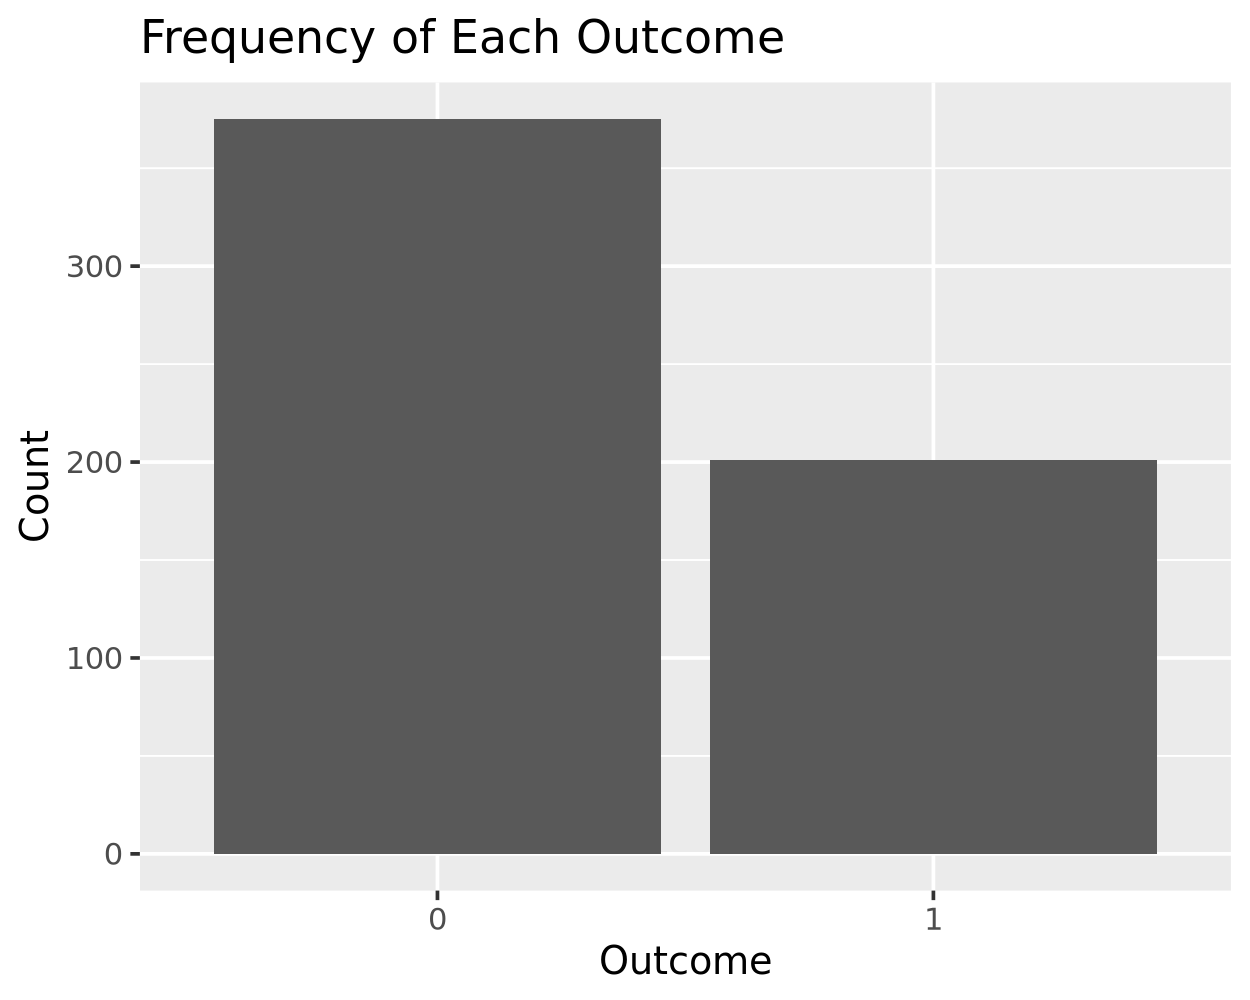

In [5]:
ggplot(diabetes_train, aes(x = Outcome)) +
  geom_bar() +
  labs(title = "Frequency of Each Outcome",
       x = "Outcome",
       y = "Count")

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No, there are significantly more 0 counts than 1.



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [6]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

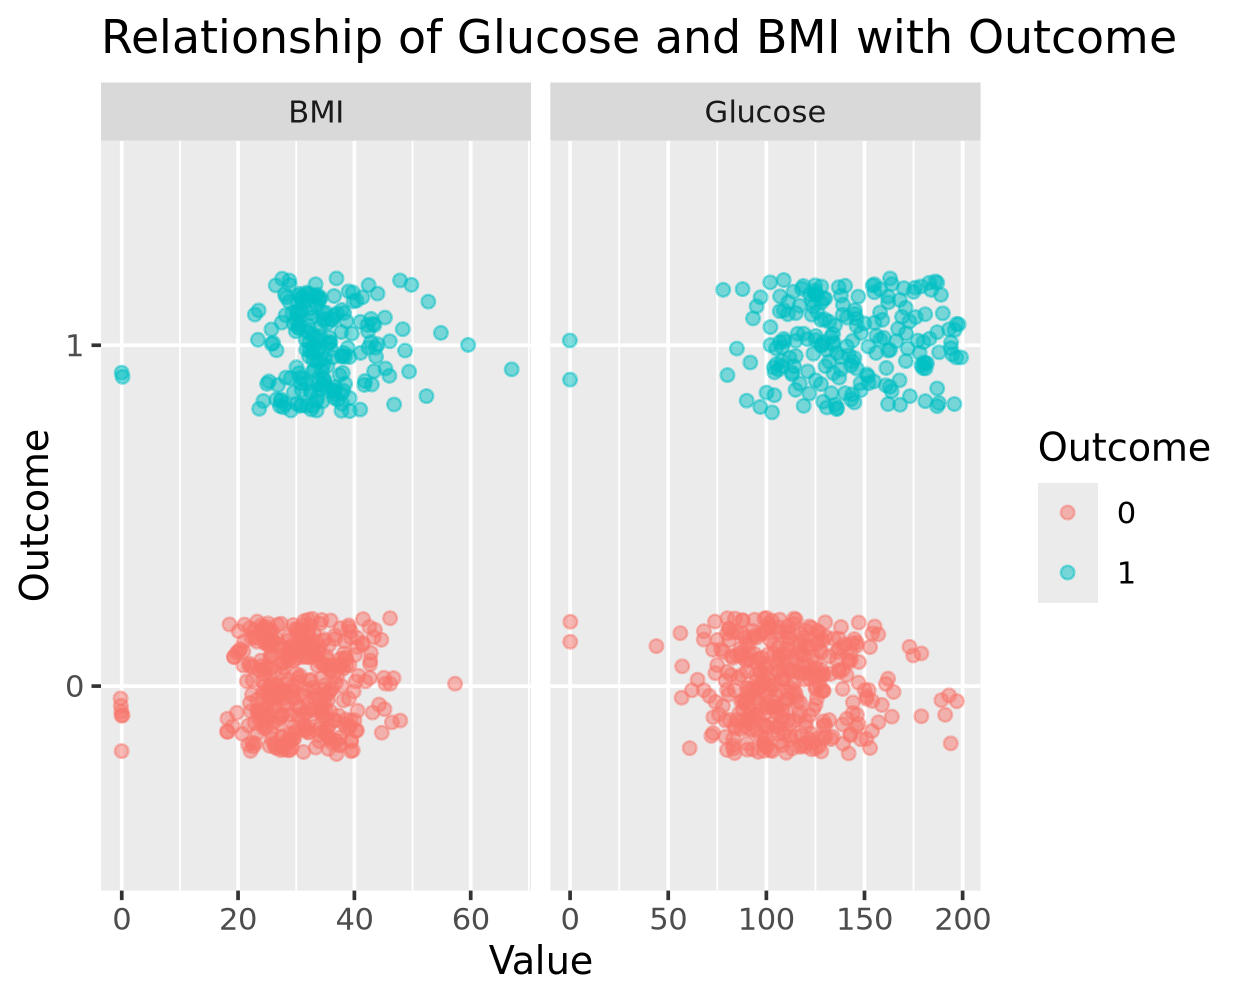

In [7]:
ggplot(plot_df, aes(x = value, y = Outcome, color = Outcome)) +
  geom_jitter(width = 0.2, height = 0.2, alpha = 0.5) +
  facet_wrap(~name, ncol = 2, scales = 'free_x') +
  labs(title = "Relationship of Glucose and BMI with Outcome",
       x = "Value",
       y = "Outcome")

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

It doesn't scale it by how high the largest value goes to, so both BMI and Glucose go from 0 to 200. This makes the data for BMI appear very condensed.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [8]:
mod_fit <- glm(Outcome ~ BMI + Glucose,
                   data = diabetes_train,
                   family = binomial)

summary(mod_fit)


Call:
glm(formula = Outcome ~ BMI + Glucose, family = binomial, data = diabetes_train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.032001   0.679582 -10.348  < 2e-16 ***
BMI          0.064346   0.015160   4.245 2.19e-05 ***
Glucose      0.034428   0.003763   9.148  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 592.06  on 573  degrees of freedom
AIC: 598.06

Number of Fisher Scoring iterations: 4


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [11]:
diabetes_test_wPred <- augment(mod_fit, newdata = diabetes_test)

# Get .pred_class
diabetes_test_wPred <- diabetes_test_wPred %>%
  mutate(.pred_class = ifelse(.fitted > 0.5, "1", "0") %>% factor(levels = c("0", "1")))

head(diabetes_test_wPred)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,.fitted,.pred_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
1,85,66,29,0,26.6,0.351,31,0,-2.39400157,0
7,100,0,0,0,30.0,0.484,32,1,-1.65880265,0
0,118,84,47,230,45.8,0.551,31,1,-0.02242591,0
7,196,90,0,0,39.8,0.451,41,1,2.27688931,1
7,147,76,0,0,39.4,0.257,43,1,0.56417334,1
1,97,66,15,140,23.2,0.487,22,0,-2.19964148,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [12]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

# Get .pred_class
diabetes_test_wPred <- diabetes_test_wPred %>%
  mutate(.pred_class = ifelse(.fitted > 0.5, "1", "0") %>% factor(levels = c("0", "1")))

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 354 131
         1  21  70

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

1. 201 individuals actually have diabetes.
2. 70 of those were predicted to have diabetes.
3. 21 individuals were predicted to have diabetes but did not.